Spotify Recommendation System - Data Preprocessing

In [8]:
# Import Libraries
import os
import numpy as np
import pandas as pd

Load data

In [9]:
data = pd.read_csv('../data/tracks.csv')
artist_data = pd.read_csv('../data/artists.csv')

In [10]:
data.shape

(586672, 20)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [12]:
data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [13]:
track_features = ['name', 'artists', 'release_date','popularity', 'duration_ms', 'explicit', 'id', 'id_artists']
data.tail(5)[track_features]

,name,artists,release_date,popularity,duration_ms,explicit,id,id_artists
586667,云与海,['阿YueYue'],2020-09-26,50,258267,0,5rgu12WBIHQtvej2MdHSH0,['1QLBXKM5GCpyQQSVMNZqrZ']
586668,blind,['ROLE MODEL'],2020-10-21,72,153293,0,0NuWgxEp51CutD2pJoF4OM,['1dy5WNgIKQU6ezkpZs4y8z']
586669,What They'll Say About Us,['FINNEAS'],2020-09-02,70,187601,0,27Y1N4Q4U3EfDU5Ubw8ws2,['37M5pPGs6V1fchFJSgCguX']
586670,A Day At A Time,"['Gentle Bones', 'Clara Benin']",2021-03-05,58,142003,0,45XJsGpFTyzbzeWK8VzR8S,"['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g..."
586671,Mar de Emociones,['Afrosound'],2015-07-01,38,214360,0,5Ocn6dZ3BJFPWh4ylwFXtn,['0i4Qda0k4nf7jnNHmSNpYv']


In [14]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness','mode','speechiness', 'tempo', 'valence']
data.tail(5)[audio_features]

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
586667,0.785,0.560,0.518,0.000000,0,0.0648,-7.471,0,0.0292,131.896,0.2110
586668,0.141,0.765,0.663,0.000297,0,0.0924,-5.223,1,0.0652,150.091,0.6860
586669,0.895,0.535,0.314,0.000150,7,0.0874,-12.823,0,0.0408,145.095,0.0663
586670,0.206,0.696,0.615,0.000003,10,0.3050,-6.212,1,0.0345,90.029,0.4380
586671,0.105,0.686,0.723,0.000000,6,0.2640,-7.067,1,0.0363,112.204,0.9750


Verify and clean data

In [15]:
def display_missing_values(df):
    for col in df.columns.tolist():
        print(f'{col} column missing values: {df[col].isnull().sum()}')
    print('\n')

In [16]:
display_missing_values(data)

id column missing values: 0
name column missing values: 71
popularity column missing values: 0
duration_ms column missing values: 0
explicit column missing values: 0
artists column missing values: 0
id_artists column missing values: 0
release_date column missing values: 0
danceability column missing values: 0
energy column missing values: 0
key column missing values: 0
loudness column missing values: 0
mode column missing values: 0
speechiness column missing values: 0
acousticness column missing values: 0
instrumentalness column missing values: 0
liveness column missing values: 0
valence column missing values: 0
tempo column missing values: 0
time_signature column missing values: 0




In [17]:
data = data.dropna()
display_missing_values(data)

id column missing values: 0
name column missing values: 0
popularity column missing values: 0
duration_ms column missing values: 0
explicit column missing values: 0
artists column missing values: 0
id_artists column missing values: 0
release_date column missing values: 0
danceability column missing values: 0
energy column missing values: 0
key column missing values: 0
loudness column missing values: 0
mode column missing values: 0
speechiness column missing values: 0
acousticness column missing values: 0
instrumentalness column missing values: 0
liveness column missing values: 0
valence column missing values: 0
tempo column missing values: 0
time_signature column missing values: 0




In [18]:
def check_duplicates(df):
    print(f"Total number of duplicates is: {df.duplicated(keep=False).sum()}")
    print('\n')

In [19]:
check_duplicates(data)

Total number of duplicates is: 0




Group data by year

In [20]:
# Group track_data by year
year_data_features = ['year', 'popularity', 'duration_ms'] + audio_features

# Convert 'release_date' to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], infer_datetime_format=True, errors='coerce')

# Extract year from 'release_date'
data['year'] = data['release_date'].dt.year

# Group data by year
year_data = data.groupby('year', as_index=False)[year_data_features].mean()

year_data['year'] = year_data['year'].astype('int64')

year_data = year_data[(year_data['year'] >= 1921) & (year_data['year'] <= 2020)]

In [21]:
year_data.shape

(99, 14)

In [22]:
year_data.head()

,year,popularity,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
1,1922,0.057971,165202.184783,0.892674,0.541207,0.329083,0.328275,4.833333,0.246547,-14.073036,0.739130,0.258699,110.133703,0.572387
2,1923,1.575342,156975.914764,0.859965,0.637332,0.266977,0.157659,3.651446,0.225396,-16.351921,0.797565,0.552072,109.552648,0.671967
3,1924,0.612954,189111.306477,0.866266,0.593344,0.356725,0.339628,4.723539,0.203447,-13.290367,0.693523,0.375208,119.457894,0.554935
4,1925,1.414175,189370.960133,0.912170,0.617391,0.263749,0.275384,5.069767,0.255157,-14.977595,0.764120,0.305693,113.901050,0.635196
5,1926,1.938776,165946.540464,0.785739,0.622113,0.263075,0.323416,5.746657,0.211447,-15.929906,0.705841,0.356952,113.386792,0.539702


In [23]:
# Save year_data to csv
year_data.to_csv('../data/processed/year_data.csv', index=False)

Preprocess data for model

In [45]:
data = pd.read_csv('../data/tracks.csv')

In [46]:
track_features = ['name', 'artists', 'release_date','popularity', 'duration_ms', 'explicit', 'id', 'id_artists']
audio_features_normalized = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
audio_features_not_normalized = ['key', 'loudness', 'mode', 'tempo', 'time_signature']

In [47]:
# Convert 'release_date' to year
data['year'] = pd.DatetimeIndex(data['release_date']).year

# Drop unnecessary columns
data = data.drop(['id', 'id_artists', 'release_date'], axis=1)

# Drop duplicates
data = data.drop_duplicates(subset=['name', 'artists'])

# Drop rows with missing values
data = data.dropna()

# Convert 'artists' to string
data['artists'] = data['artists'].apply(lambda x: x[1:-1].replace("'", ""))

In [49]:
# normalize audio features use min-max normalization, write a function
not_normalized_features = ['popularity', 'duration_ms'] + audio_features_not_normalized

def normalize(df, features):
    result = df.copy()
    for feature_name in features:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


In [50]:
final_data = normalize(data, not_normalized_features)

In [51]:
#check data statistics
final_data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
count,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000,526609.000000
mean,0.274857,0.040146,0.044986,0.564123,0.540095,0.474506,0.760680,0.657309,0.109139,0.452924,0.113000,0.214780,0.552379,0.480600,0.774052,1988.415297
std,0.183125,0.022937,0.207273,0.166480,0.251820,0.319880,0.078087,0.474610,0.187529,0.347830,0.266417,0.185024,0.257931,0.121042,0.096138,22.790450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,0.130000,0.030214,0.000000,0.454000,0.341000,0.181818,0.719408,0.000000,0.034100,0.101000,0.000000,0.098500,0.346000,0.387522,0.800000,1974.000000
50%,0.270000,0.037409,0.000000,0.578000,0.546000,0.454545,0.775483,1.000000,0.044600,0.430000,0.000023,0.139000,0.564000,0.475824,0.800000,1992.000000
75%,0.400000,0.046210,0.000000,0.687000,0.746000,0.727273,0.817869,1.000000,0.078200,0.786000,0.009250,0.279000,0.769000,0.553569,0.800000,2007.000000
max,1.000000,1.000000,1.000000,0.991000,1.000000,1.000000,1.000000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000


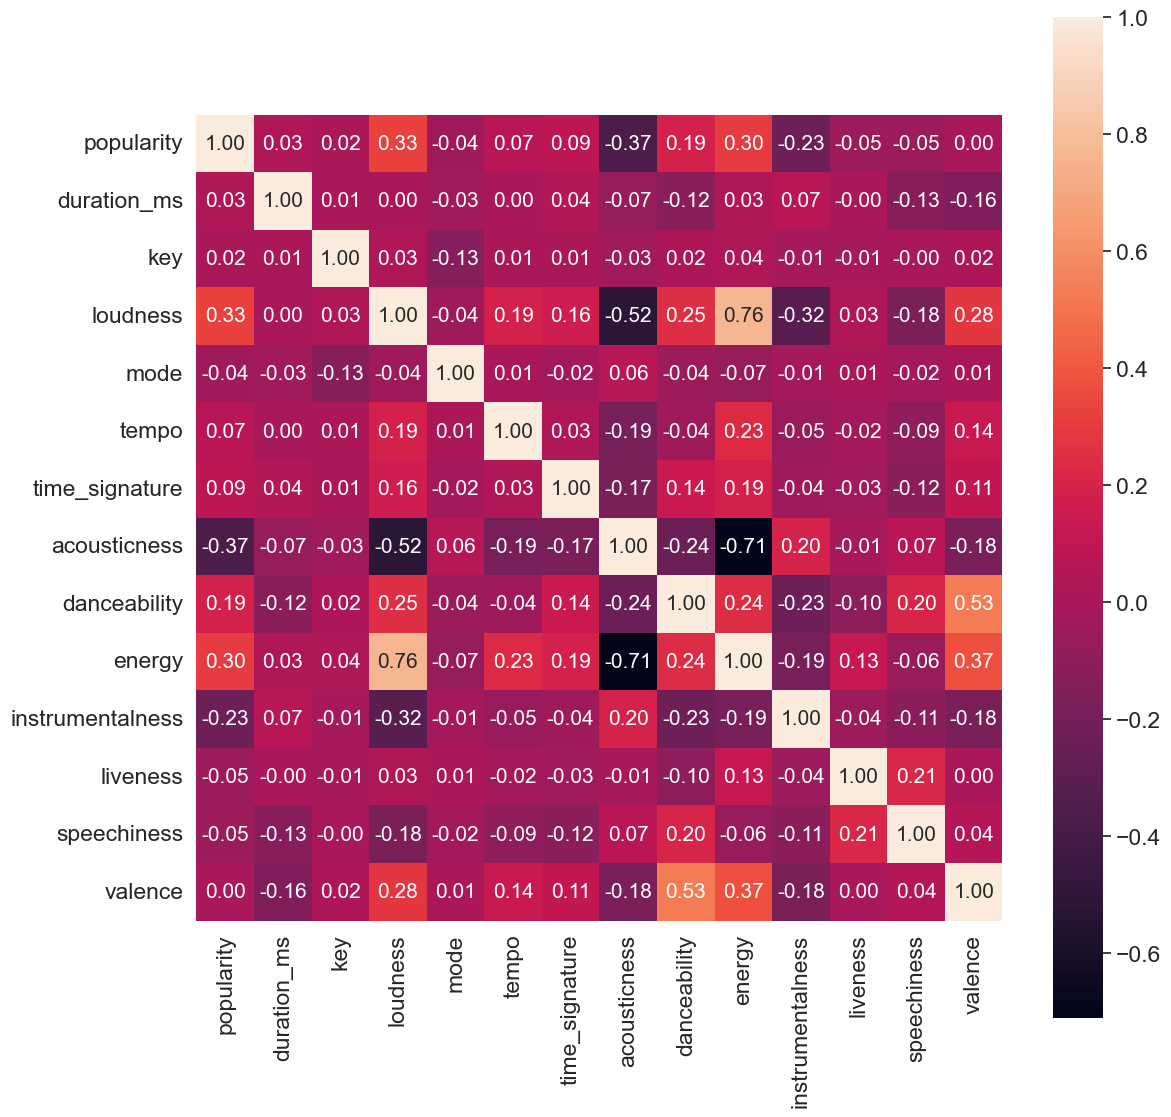

In [59]:
# Correlation matrix use seaborn
features = not_normalized_features + audio_features_normalized
corr_matrix = np.corrcoef(final_data[features].values.T)

import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(13, 13))
hm = sns.heatmap(corr_matrix,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=features,
                 xticklabels=features)
plt.show()




In [60]:
# Save final_data to csv
final_data.to_csv('../data/processed/final_data.csv', index=False)